# 📊 Supermart Grocery Sales



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

sns.set(style='whitegrid')

In [2]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv(next(iter(uploaded)))
df.head()

Saving Supermart Grocery Sales - Retail Analytics Dataset.csv to Supermart Grocery Sales - Retail Analytics Dataset.csv


,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [3]:
print(df.info())
print(df.isnull().sum())

df.drop_duplicates(inplace=True)

df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

df['Day'] = df['Order Date'].dt.day
df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB
None
Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64


,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Day,Month,Year
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu,8.0,11.0,2017.0
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu,8.0,11.0,2017.0
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu,12.0,6.0,2017.0
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu,11.0,10.0,2016.0
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu,11.0,10.0,2016.0


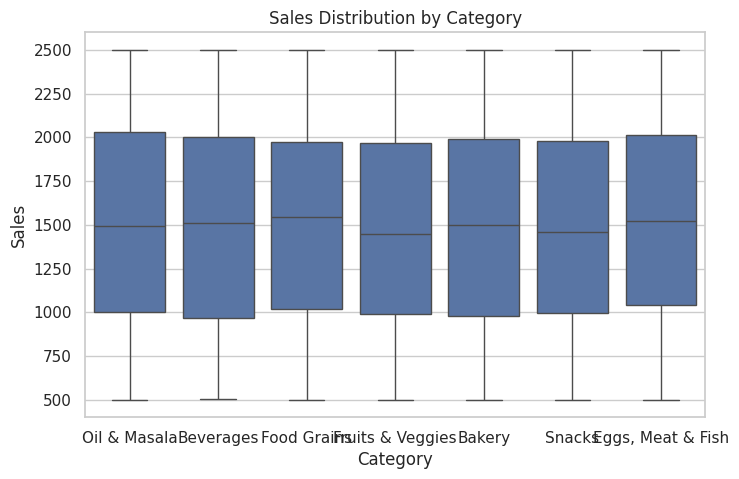

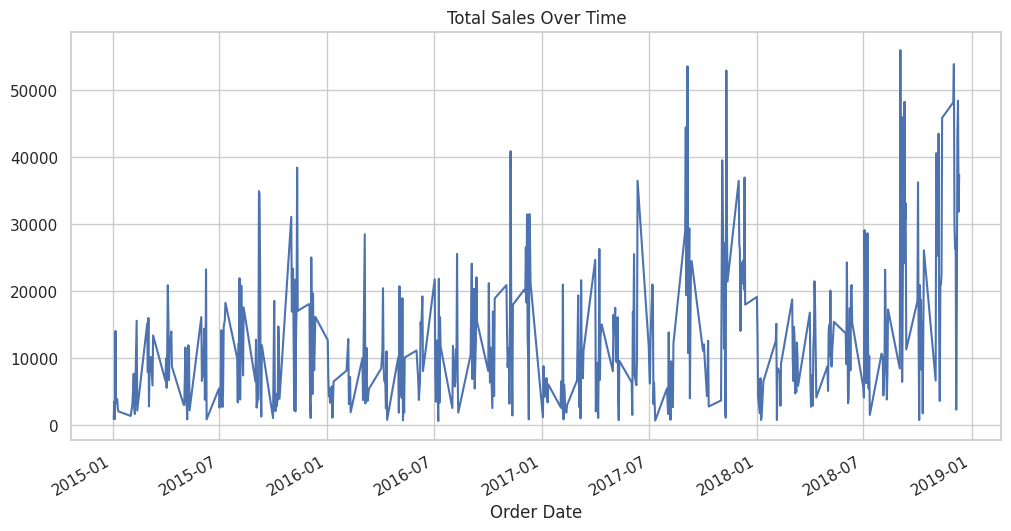

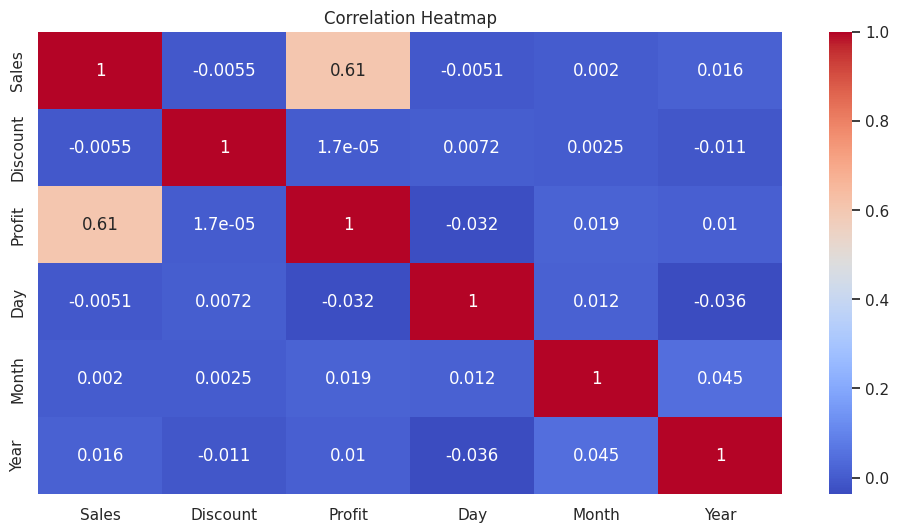

In [4]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Category', y='Sales', data=df)
plt.title('Sales Distribution by Category')
plt.show()

plt.figure(figsize=(12,6))
df.groupby('Order Date')['Sales'].sum().plot()
plt.title('Total Sales Over Time')
plt.show()

plt.figure(figsize=(12,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [5]:
le = LabelEncoder()
for col in ['Category','Sub Category','City','Region','State']:
    df[col] = le.fit_transform(df[col])

df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Day,Month,Year
0,OD1,Harish,5,14,21,2017-11-08,2,1254,0.12,401.28,0,8.0,11.0,2017.0
1,OD2,Sudha,1,13,8,2017-11-08,3,749,0.18,149.80,0,8.0,11.0,2017.0
2,OD3,Hussain,3,0,13,2017-06-12,4,2360,0.21,165.20,0,12.0,6.0,2017.0
3,OD4,Jackson,4,12,4,2016-10-11,3,896,0.25,89.60,0,11.0,10.0,2016.0
4,OD5,Ridhesh,3,18,12,2016-10-11,3,2355,0.26,918.45,0,11.0,10.0,2016.0


In [6]:
print(df.info())
print(df.isnull().sum())

df.drop_duplicates(inplace=True)

df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

df['Day'] = df['Order Date'].dt.day
df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year

df.fillna(0, inplace=True)

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Customer Name  9994 non-null   object        
 2   Category       9994 non-null   int64         
 3   Sub Category   9994 non-null   int64         
 4   City           9994 non-null   int64         
 5   Order Date     4042 non-null   datetime64[ns]
 6   Region         9994 non-null   int64         
 7   Sales          9994 non-null   int64         
 8   Discount       9994 non-null   float64       
 9   Profit         9994 non-null   float64       
 10  State          9994 non-null   int64         
 11  Day            4042 non-null   float64       
 12  Month          4042 non-null   float64       
 13  Year           4042 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(6), object(2)
memory usage: 1.1+

/tmp/ipython-input-2123936325.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df.fillna(0, inplace=True)


,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Day,Month,Year
0,OD1,Harish,5,14,21,2017-11-08 00:00:00,2,1254,0.12,401.28,0,8.0,11.0,2017.0
1,OD2,Sudha,1,13,8,2017-11-08 00:00:00,3,749,0.18,149.80,0,8.0,11.0,2017.0
2,OD3,Hussain,3,0,13,2017-06-12 00:00:00,4,2360,0.21,165.20,0,12.0,6.0,2017.0
3,OD4,Jackson,4,12,4,2016-10-11 00:00:00,3,896,0.25,89.60,0,11.0,10.0,2016.0
4,OD5,Ridhesh,3,18,12,2016-10-11 00:00:00,3,2355,0.26,918.45,0,11.0,10.0,2016.0


MSE: 212718.45, R2: 0.36


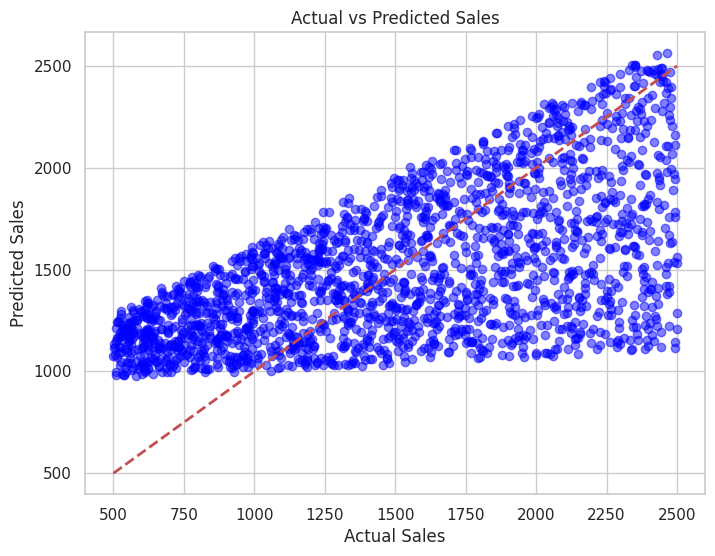

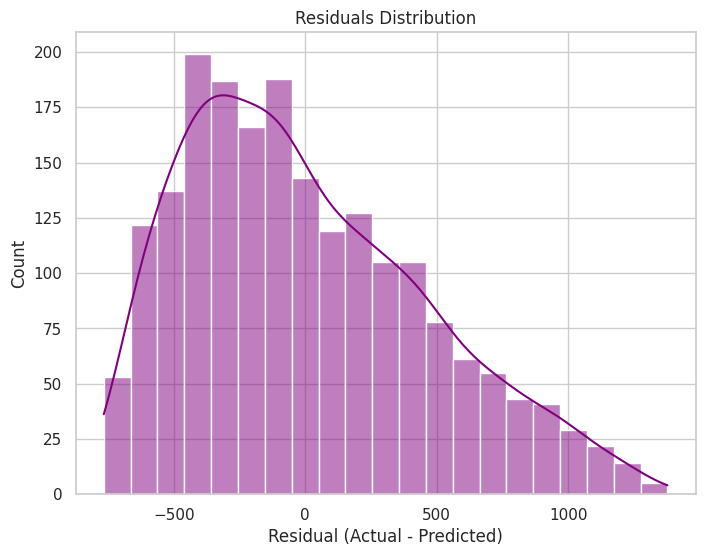

In [7]:
X = df.drop(columns=['Order ID','Customer Name','Order Date','Sales'])
y = df['Sales']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse:.2f}, R2: {r2:.2f}')

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True, color="purple")
plt.title("Residuals Distribution")
plt.xlabel("Residual (Actual - Predicted)")
plt.show()